# Yulu Business Case.

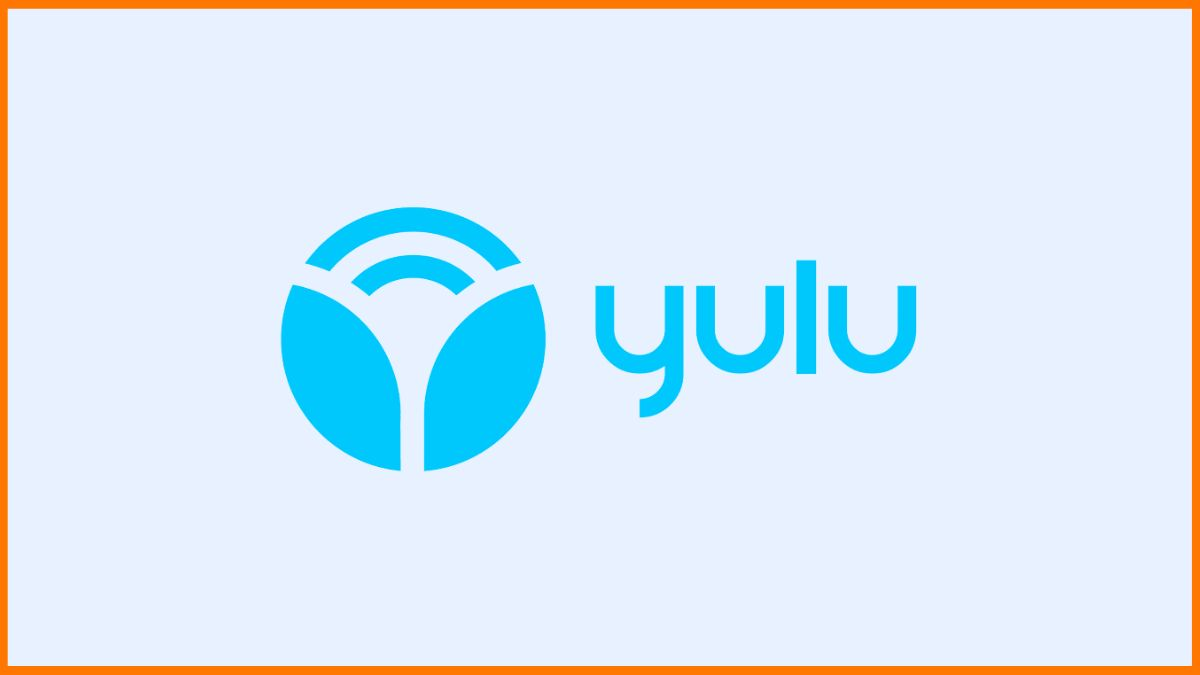

## About Yulu:
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!



## Business Problem:
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

## About the dataset
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    - 1: Clear, Few clouds, partly cloudy, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

## Importing Libraries

In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import ttest_ind,f_oneway,chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro,levene,kruskal

## Reading the data

In [274]:
df = pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Datatype of all attributes

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Shape of the Dataset
The dataset has 12 columns and 10886 rows.

In [276]:
df.shape

(10886, 12)

## Checking for Null Values
It is observed that there are no values.

In [277]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

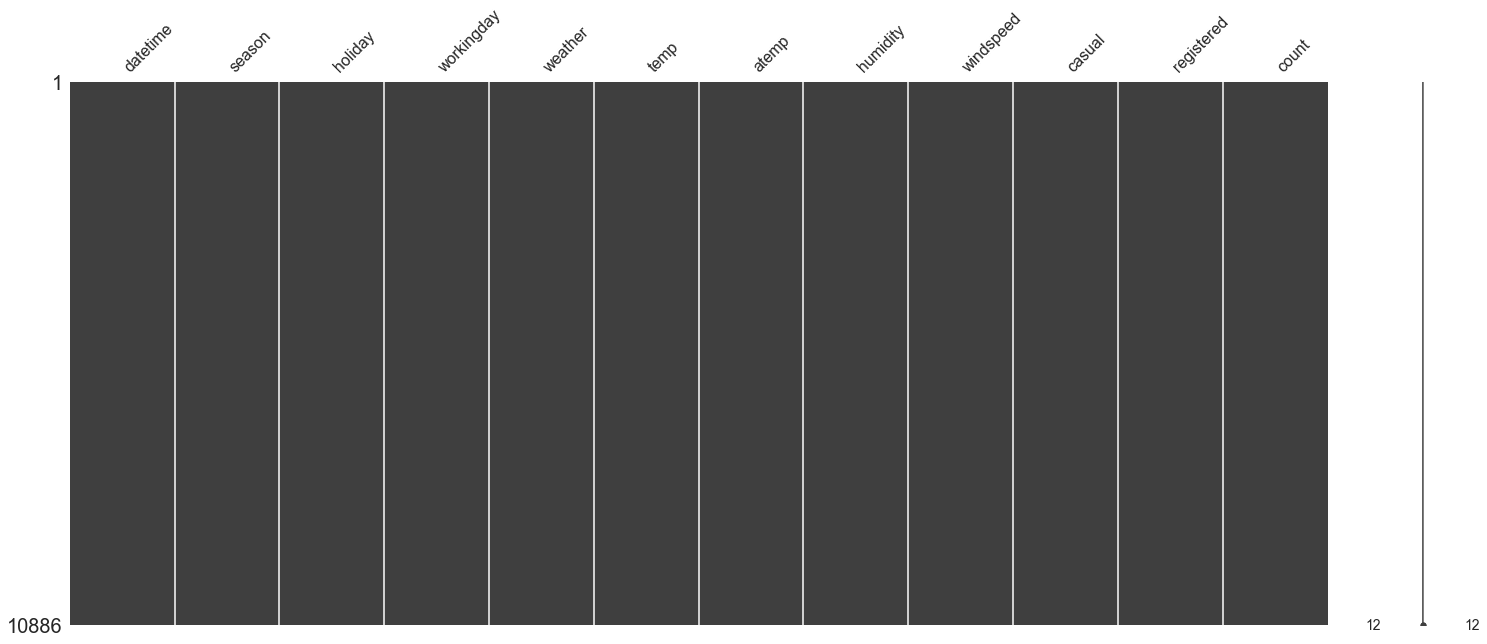

In [278]:
#Missingno library provides a very nice to visualize the distribution of Nan values.
msno.matrix(df)
plt.show()

## Observations
- It is observed that the provided dataset doesnot have any missing values.

## Changing some Numerical attributes to Categorical attributes.
We change the numerical values of season,holiday,workingday and weather attribute to Categorical because of encoding.


In [279]:
df['season'] = df['season'].astype('str')
df['holiday'] = df['holiday'].astype('str')
df['workingday'] = df['workingday'].astype('str')
df['weather'] = df['weather'].astype('str')

## Converting datetime attribute to datetime format from object

In [280]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


## Separating Datetime to Date and time

In [282]:
df['Date'] = df['datetime'].dt.date
df['Time'] = df['datetime'].dt.time

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  Date        10886 non-null  object        
 13  Time        10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 1.2+ MB


## Descriptive analysis of Numerical Columns

In [284]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Descriptive analysis of Categorical Columns

In [285]:
df.describe(include = 'object')

,season,holiday,workingday,weather,Date,Time
count,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,456,24
top,4,0,1,1,2011-01-01,12:00:00
freq,2734,10575,7412,7192,24,456


## Observations
- The most frequent season is season 4 - winter.
- The most frequent weather is weather 4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Univariate Analysis and Outlier Detection for Numerical Attributes

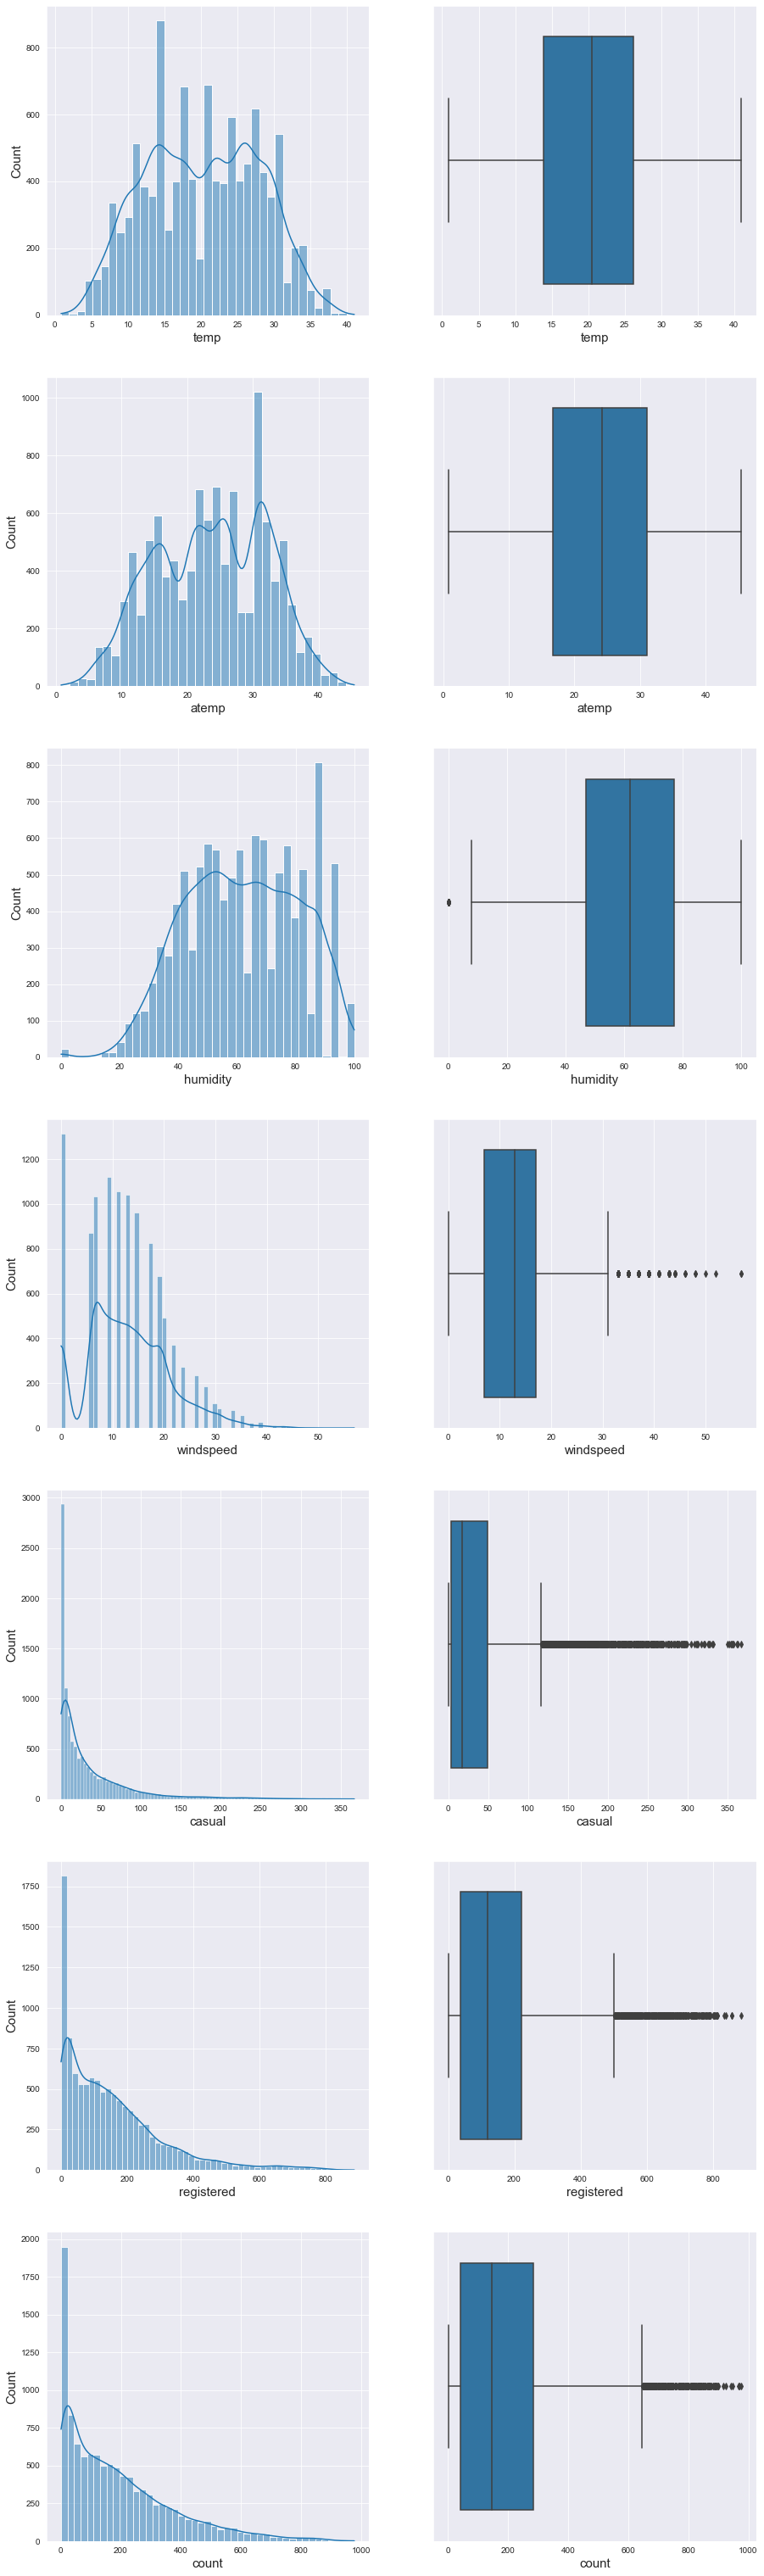

In [286]:
columns = ['temp','atemp','humidity','windspeed',
           'casual','registered','count']
plt.figure(figsize = (15,55))
sns.set_style('darkgrid')
for i in range(len(columns)):
    plt.subplot(7,2,(2*i)+1)
    sns.histplot(data = df,x = columns[i],kde = True)
    plt.xlabel(columns[i],fontsize = 15)
    plt.ylabel('Count',fontsize = 15)
    
    plt.subplot(7,2,(2*i)+2)
    sns.boxplot(data = df,x = columns[i])
    plt.xlabel(columns[i],fontsize = 15)
plt.show()

## Observations:
- Temperature attribute follows a distribution, that is not skewed, and has no outliers.
- Feeling temperature attribute follows a distribution, that is not skewed, and has no outliers.
- Humiditiy attribute follows a distribution that is slightly skewed towards left and has some outliers.
- Windspeed attribute follows a right-skewed distribution and has outliers.
- Casual, Registered and Count attribures follw a right-skewed distribution and has outliers.

## Univariate Analysis for categorical attributes

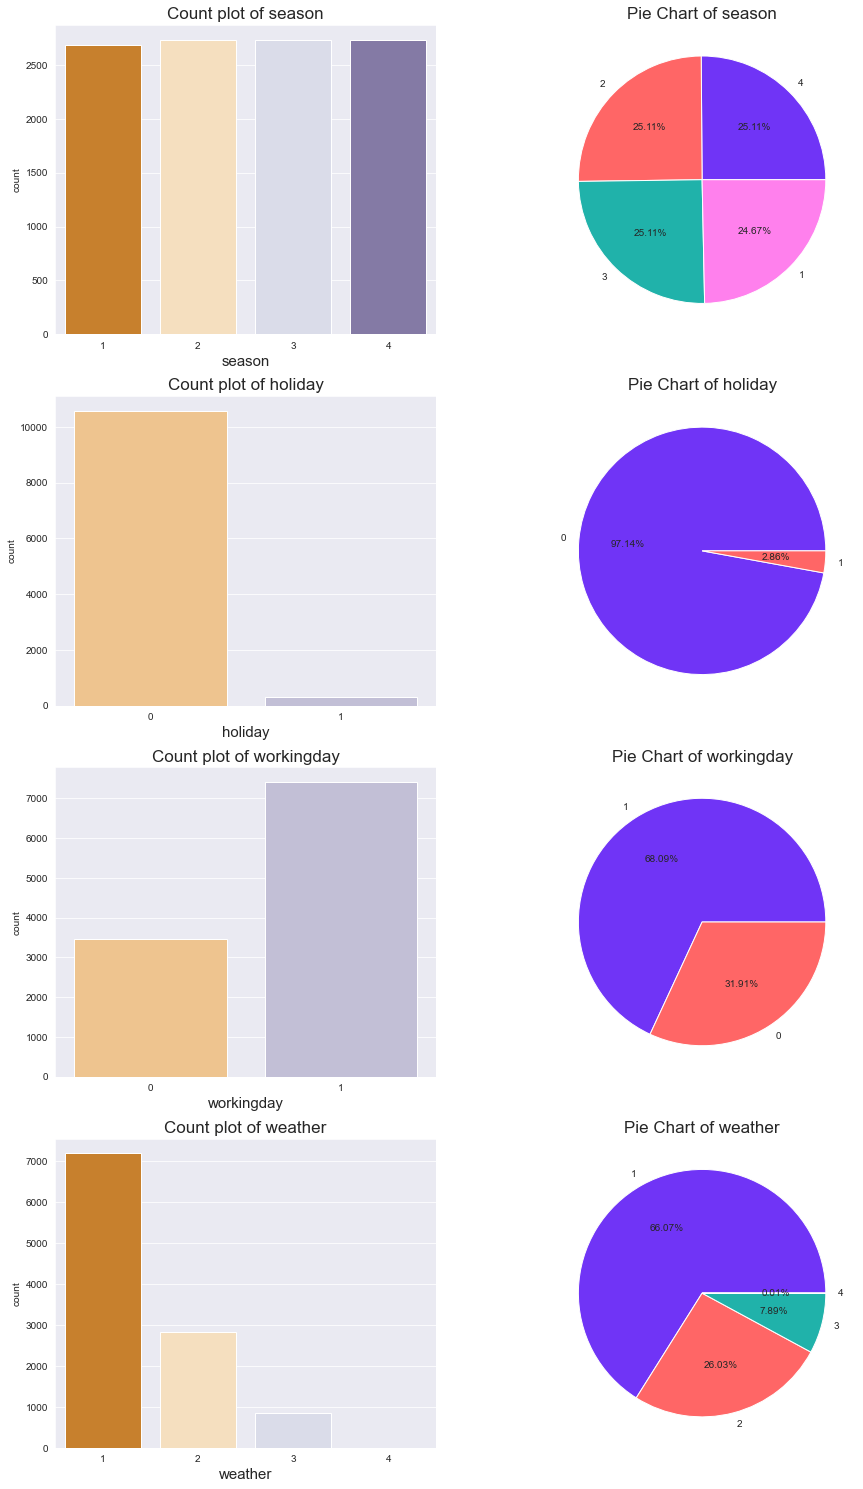

In [287]:
columns = ['season','holiday','workingday','weather']
colors = ['#7034F6','#ff6666','#20b2aa','#ff80ed']
plt.figure(figsize = (15,33))
for i in range(len(columns)):
    plt.subplot(5,2,(2*i)+1)
    plt.title('Count plot of '+columns[i], fontsize = 17)
    sns.countplot(data = df,x = columns[i],palette = 'PuOr')
    plt.xlabel(columns[i],fontsize = 15)
    
    plt.subplot(5,2,(2*i)+2)
    x = df[columns[i]].value_counts().reset_index(name = 'counts')
    plt.pie(x = x['counts'],labels = x['index'],autopct = '%0.2f%%',colors = colors)
    plt.title('Pie Chart of '+columns[i],fontsize = 17)
plt.show()

## Observations:
- Seasons: Spring, summer, fall and winter have counts very close to each other. Summer is 24.67% of the data and other seasons are have 25.11% of the data each.
- The number of holidays is less than non-holidays.
- The number of working days is more than non-working days or holidays
- The weather of Clear,Few Clouds,partly cloudy is the most frequent as compared to other weather categories.

## Bi-variate Analysis

### Total Number of bikes rented based on Season

In [288]:
season_count = df.groupby('season')[['casual',
                                     'registered',
                                     'count']].aggregate('sum').reset_index()
season_count

,season,casual,registered,count
0,1,41605,270893,312498
1,2,129672,458610,588282
2,3,142718,497944,640662
3,4,78140,465894,544034


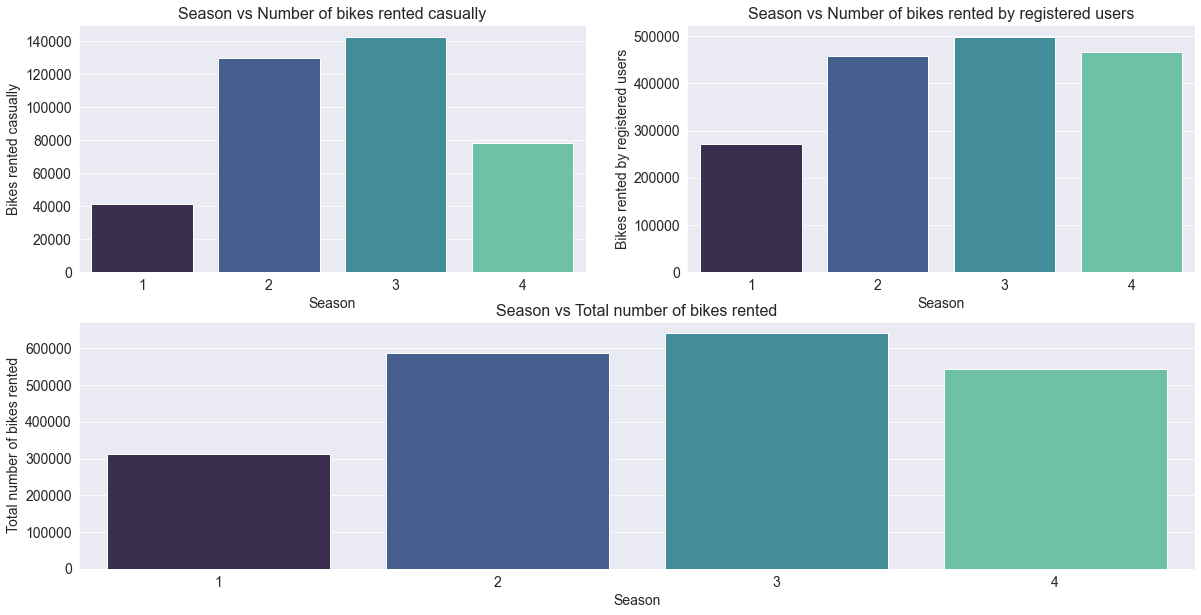

In [289]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.title('Season vs Number of bikes rented casually',fontsize = 16)
sns.barplot(data = season_count,y = 'casual',
            x= 'season',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented casually',fontsize = 14)
plt.xlabel('Season',fontsize = 14)

plt.subplot(2,2,2)
plt.title('Season vs Number of bikes rented by registered users',fontsize = 16)
sns.barplot(data = season_count,y = 'registered',
            x = 'season',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented by registered users',fontsize = 14)
plt.xlabel('Season',fontsize = 14)

plt.subplot(2,1,2)
plt.title('Season vs Total number of bikes rented',fontsize = 16)
sns.barplot(data = season_count,y = 'count',
            x = 'season',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Season',fontsize = 14)
plt.ylabel('Total number of bikes rented',fontsize = 14)

plt.show()

## Observations:
- In season 3 (Fall) the number of bookings of casually rented,registered and also total count of bikes is highest.

### Total number of bikes rented based on holidays

In [290]:
holiday_count = df.groupby('holiday')[['casual',
                                       'registered',
                                       'count']].aggregate('sum').reset_index()
holiday_count

,holiday,casual,registered,count
0,0,376964,1650704,2027668
1,1,15171,42637,57808


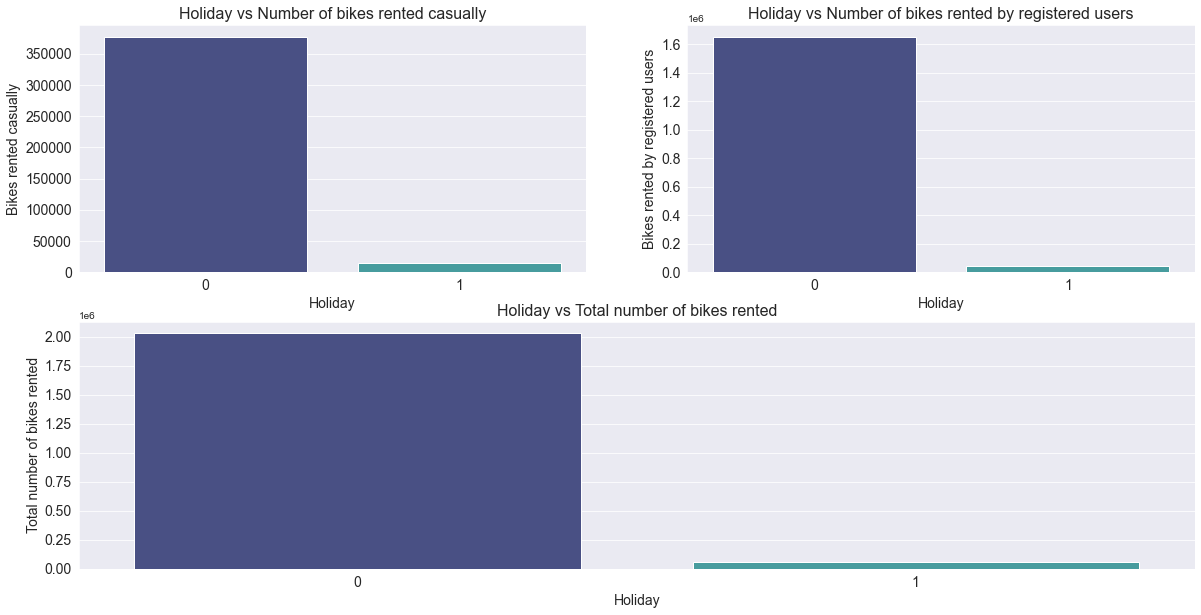

In [291]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.title('Holiday vs Number of bikes rented casually',
          fontsize = 16)
sns.barplot(data = holiday_count,y = 'casual',
            x= 'holiday',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented casually',fontsize = 14)
plt.xlabel('Holiday',fontsize = 14)

plt.subplot(2,2,2)
plt.title('Holiday vs Number of bikes rented by registered users',
          fontsize = 16)
sns.barplot(data = holiday_count,y = 'registered',
            x = 'holiday',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented by registered users',fontsize = 14)
plt.xlabel('Holiday',fontsize = 14)

plt.subplot(2,1,2)
plt.title('Holiday vs Total number of bikes rented',
          fontsize = 16)
sns.barplot(data = holiday_count,y = 'count',
            x = 'holiday',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Holiday',fontsize = 14)
plt.ylabel('Total number of bikes rented',fontsize = 14)

plt.show()

## Observations:
- In non holidays the number of bookings are highest for both casually and registered rented bikes as well as total count of rented bikes.

### Number of bikes rented based on workingday

In [292]:
workingday_count = df.groupby('workingday')[['casual','registered','count']].aggregate('sum').reset_index()
workingday_count

,workingday,casual,registered,count
0,0,206037,448835,654872
1,1,186098,1244506,1430604


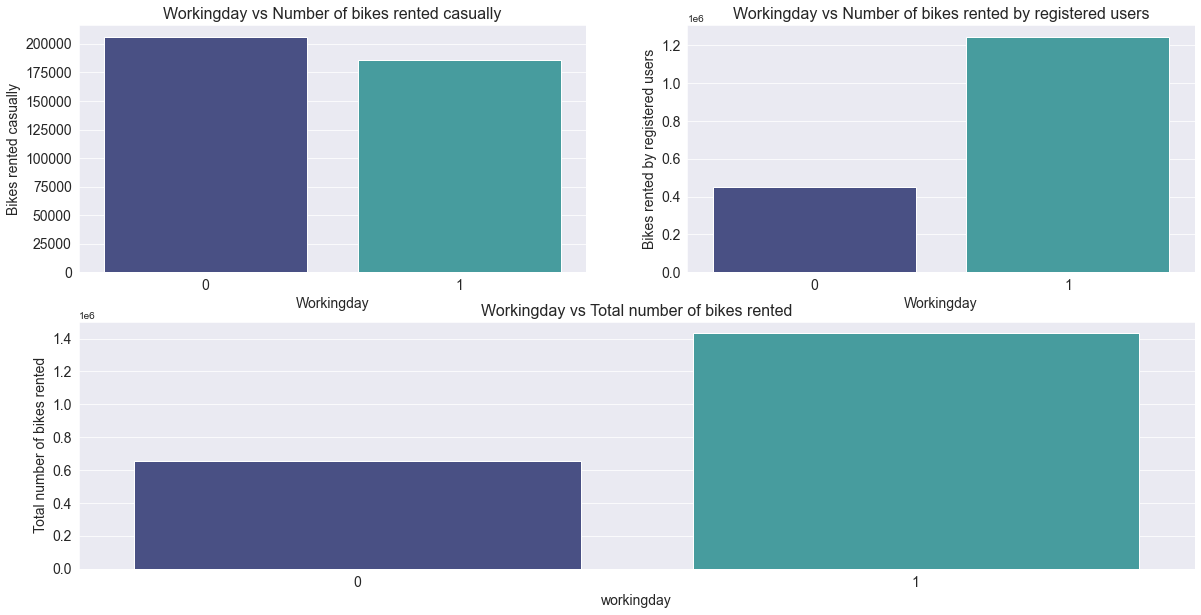

In [293]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.title('Workingday vs Number of bikes rented casually',
          fontsize = 16)
sns.barplot(data = workingday_count,y = 'casual',
            x= 'workingday',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented casually',fontsize = 14)
plt.xlabel('Workingday',fontsize = 14)

plt.subplot(2,2,2)
plt.title('Workingday vs Number of bikes rented by registered users',
          fontsize = 16)
sns.barplot(data = workingday_count,y = 'registered',
            x = 'workingday',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented by registered users',fontsize = 14)
plt.xlabel('Workingday',fontsize = 14)

plt.subplot(2,1,2)
plt.title('Workingday vs Total number of bikes rented',
          fontsize = 16)
sns.barplot(data = workingday_count,y = 'count',
            x = 'workingday',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('workingday',fontsize = 14)
plt.ylabel('Total number of bikes rented',fontsize = 14)

plt.show()

## Observations:
- It is observed that for casually rented bikes the number of bookings is highest on Non working days.
- For the registered bikes and the overall total count of rented bikes the highest booking is seen on working days.

### Number of bikes rented based on weather

In [294]:
weather_count = df.groupby('weather')[['casual',
                    'registered','count']].aggregate('sum').reset_index()
weather_count

,weather,casual,registered,count
0,1,289900,1186163,1476063
1,2,87246,419914,507160
2,3,14983,87106,102089
3,4,6,158,164


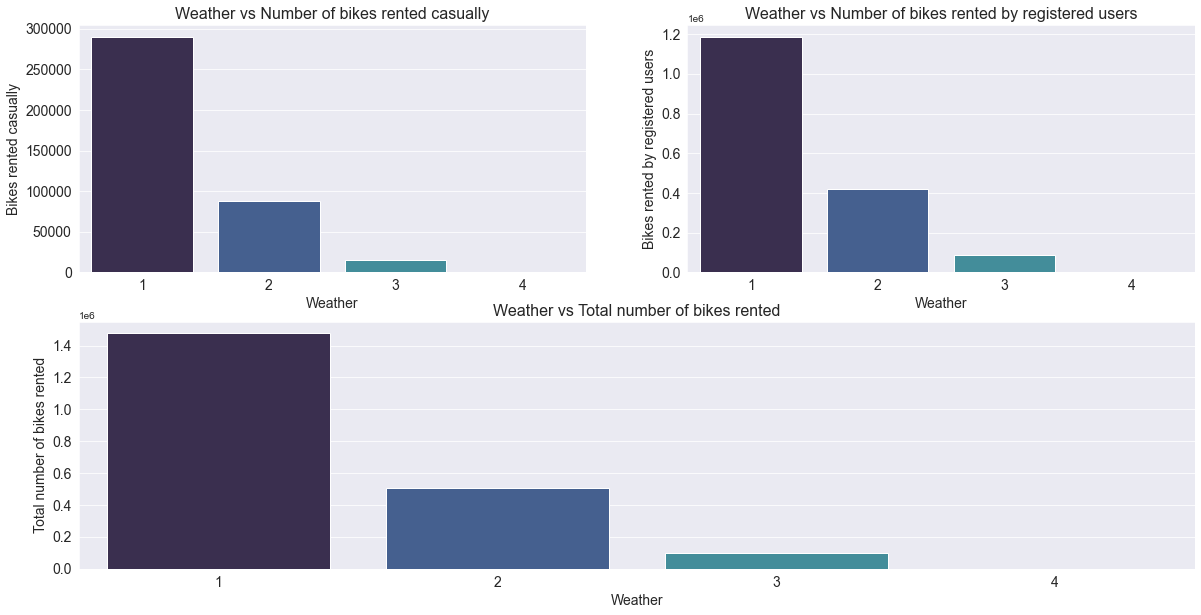

In [295]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.title('Weather vs Number of bikes rented casually',
          fontsize = 16)
sns.barplot(data = weather_count,y = 'casual',
            x= 'weather',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented casually',fontsize = 14)
plt.xlabel('Weather',fontsize = 14)

plt.subplot(2,2,2)
plt.title('Weather vs Number of bikes rented by registered users',
          fontsize = 16)
sns.barplot(data = weather_count,y = 'registered',
            x = 'weather',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Bikes rented by registered users',fontsize = 14)
plt.xlabel('Weather',fontsize = 14)

plt.subplot(2,1,2)
plt.title('Weather vs Total number of bikes rented',
          fontsize = 16)
sns.barplot(data = weather_count,y = 'count',
            x = 'weather',palette = 'mako')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Weather',fontsize = 14)
plt.ylabel('Total number of bikes rented',fontsize = 14)

plt.show()

## Observations:
- It is observed that highest number of bookings is done on weather 1 (Clear, Few Clouds, partly cloudy) for both casually and registered rented bikes as well as the overall count of bookings. 

### Number of bikes rented based on temperature, feeling temperature, humidity and windspeed

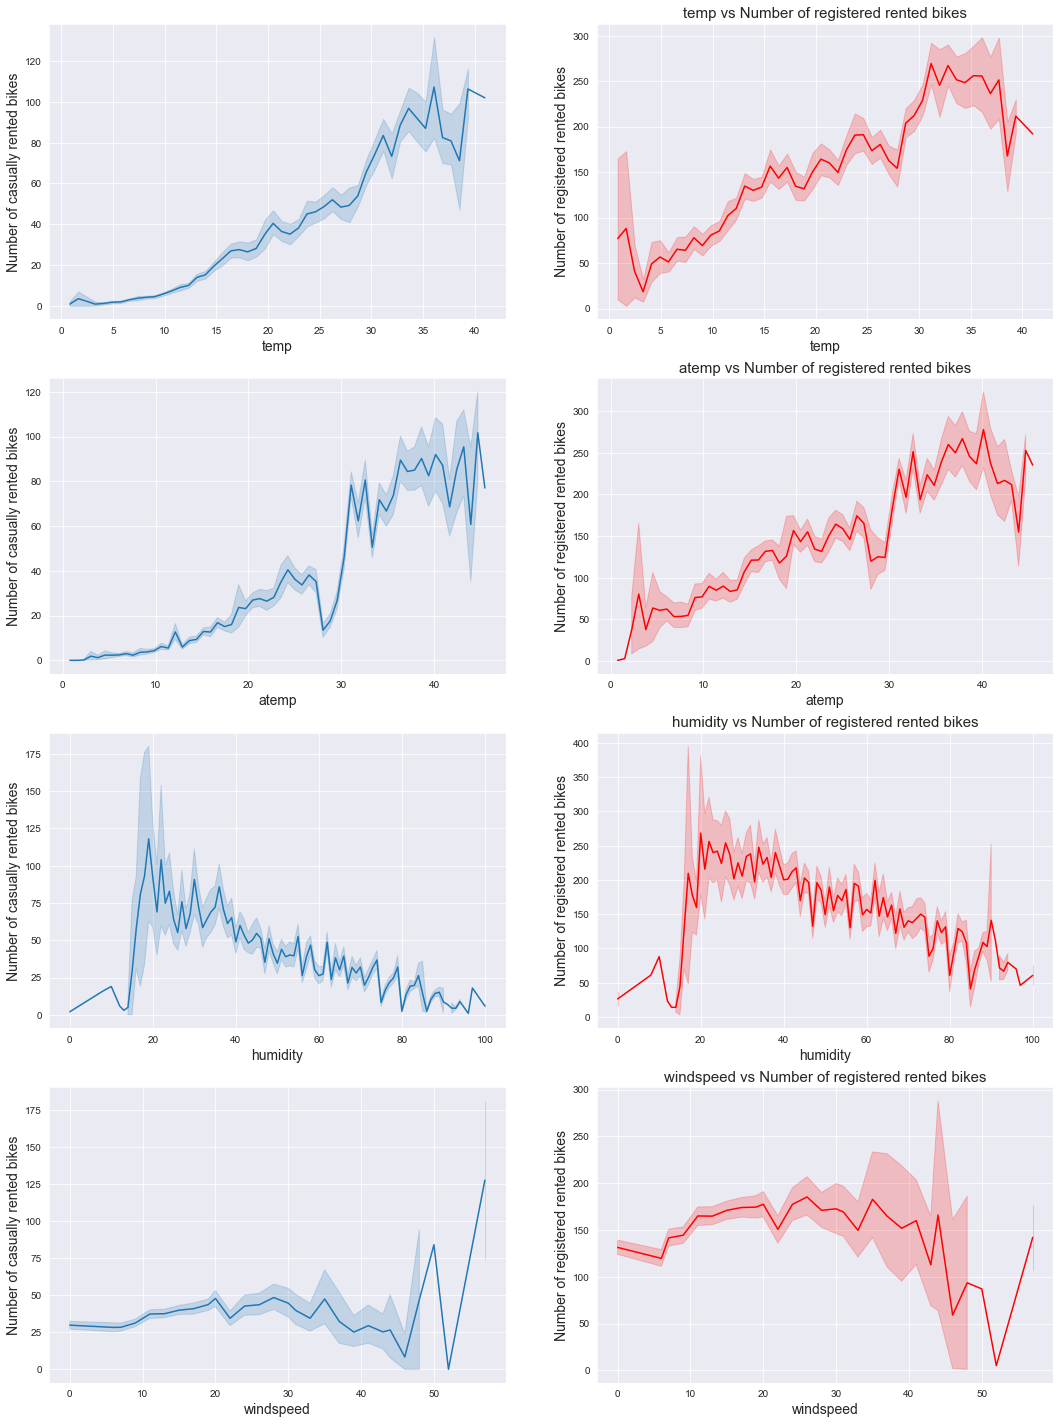

In [296]:
columns = ['temp','atemp','humidity','windspeed']
plt.figure(figsize = (18,25))
for i in range(len(columns)):
    plt.subplot(4,2,(2*i)+1)
    #plt.title(f'{columns[i]} vs Number of casually rented bikes',
             #fontsize = 15)
    sns.lineplot(data = df,y = 'casual',x = columns[i])
    plt.xlabel(columns[i],fontsize = 14)
    plt.ylabel('Number of casually rented bikes',
              fontsize = 14)
    
    plt.subplot(4,2,(2*i)+2)
    plt.title(f'{columns[i]} vs Number of registered rented bikes',
             fontsize = 15)
    sns.lineplot(data = df,y = 'registered',
                 x = columns[i],color = 'r')
    plt.xlabel(columns[i],fontsize = 14)
    plt.ylabel('Number of registered rented bikes',
              fontsize = 14)
    
plt.show()

## Observations:
- 1. It is observed that as the temperature increases the number of bookings of casually registered bikes have increased. For registered rented bikes the overall number of bookings have also increased with lots of dips in between.
- 2. It is observed that for feeling temperature follows the same pattern as temperature for both registered and casually rented bikes.
- 3. For humidity the overall number of bookings of registered and casually rented bikes remains the same with multiple ups and downs in between.
- 4. For windspeed the overall number of bookings in casually rented bikes have increased with multiple downs in between. For registered bookings the overall number of bookings have remained the same with multiple ups and downs.


### Time of the day vs Average amount of bikes rented casually

In [297]:
c_count = df.groupby('Time')['casual'].aggregate('mean').reset_index()
c_count

,Time,casual
0,00:00:00,10.312088
1,01:00:00,6.513216
2,02:00:00,4.819196
3,03:00:00,2.681293
4,04:00:00,1.262443
5,05:00:00,1.455752
6,06:00:00,4.149451
7,07:00:00,10.914286
8,08:00:00,21.542857
9,09:00:00,30.956044


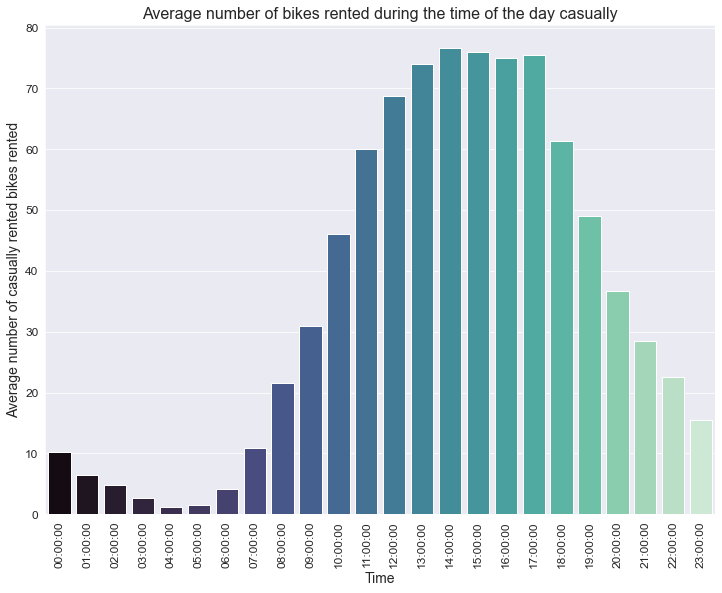

In [298]:
plt.figure(figsize = (12,9))
plt.title('Average number of bikes rented during the time of the day casually',
         fontsize = 16)
sns.barplot(x = 'Time',y = 'casual',
            data = c_count,palette = 'mako')
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time',fontsize = 14)
plt.ylabel('Average number of casually rented bikes rented',
           fontsize = 14)
plt.show()

## Observations:
- It is oberserved that at 14:00:00 the average number of casually rented  bookings is highest.

### Time of the day vs average number of registered bikes rented

In [299]:
r_count = df.groupby('Time')['registered'].aggregate('mean').reset_index()
r_count

,Time,registered
0,00:00:00,44.826374
1,01:00:00,27.345815
2,02:00:00,18.080357
3,03:00:00,9.076212
4,04:00:00,5.144796
5,05:00:00,18.311947
6,06:00:00,72.109890
7,07:00:00,202.202198
8,08:00:00,341.226374
9,09:00:00,190.824176


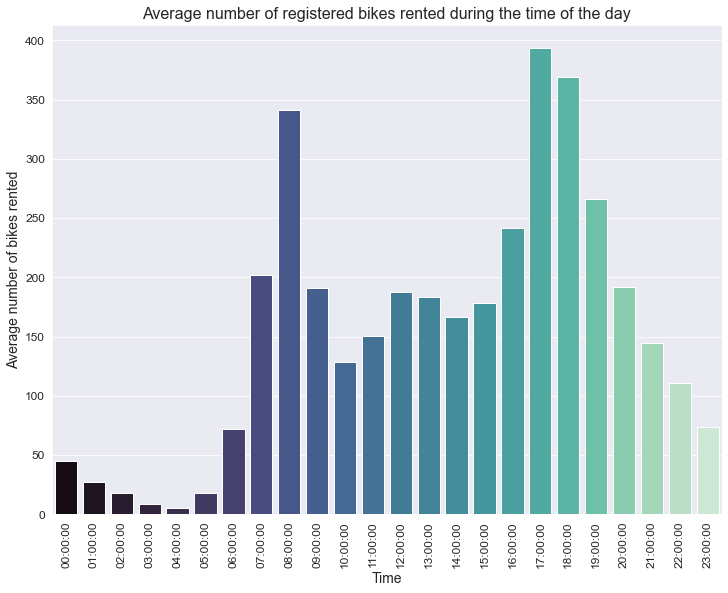

In [300]:
plt.figure(figsize = (12,9))
plt.title('Average number of registered bikes rented during the time of the day',
         fontsize = 16)
sns.barplot(x = 'Time',y = 'registered',
            data = r_count,palette = 'mako')
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time',fontsize = 14)
plt.ylabel('Average number of bikes rented',fontsize = 14)
plt.show()

## Observations:
- It is observed that at 17:00:00 the average number of registered bikes bookings is highest.

## Multivariate Analysis

### Relationship between season,holiday and number of bikes rented

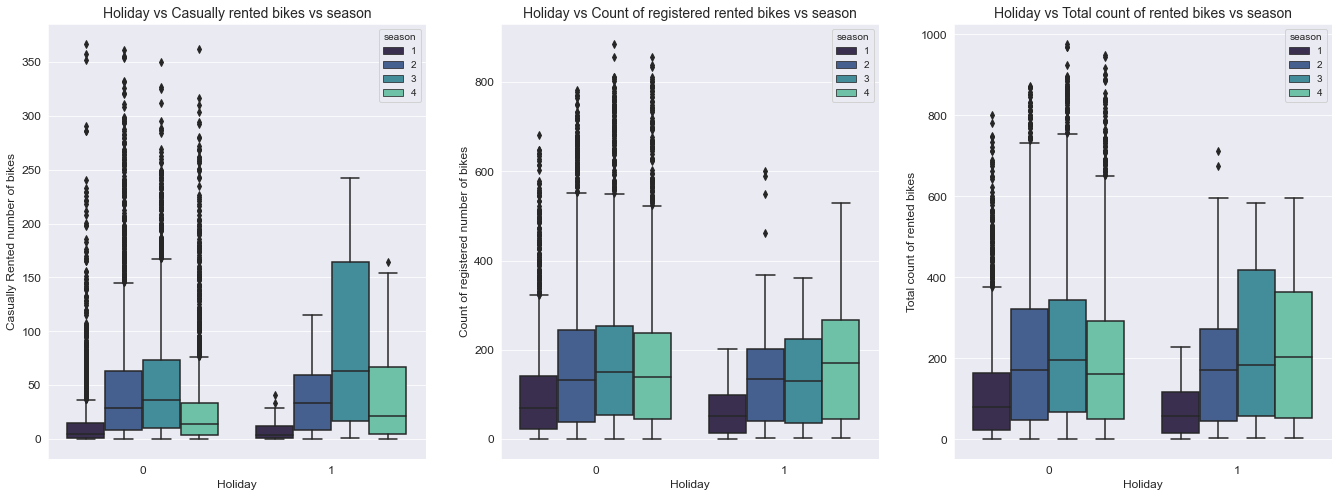

In [301]:
plt.figure(figsize = (23,8))
plt.subplot(1,3,1)
plt.title('Holiday vs Casually rented bikes vs season',
         fontsize = 14)
sns.boxplot(x = 'holiday',y = 'casual',hue = 'season',
            palette = 'mako',data = df)
plt.xlabel('Holiday',fontsize = 12)
plt.ylabel('Casually Rented number of bikes',
          fontsize = 12)
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)

plt.subplot(1,3,2)
plt.title('Holiday vs Count of registered rented bikes vs season',
         fontsize = 14)
sns.boxplot(x = 'holiday',y = 'registered',hue = 'season',
            palette = 'mako',data = df)
plt.xlabel('Holiday',fontsize = 12)
plt.ylabel('Count of registered number of bikes',
          fontsize = 12)
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)

plt.subplot(1,3,3)
plt.title('Holiday vs Total count of rented bikes vs season',
         fontsize = 14)
sns.boxplot(x = 'holiday',y = 'count',hue = 'season',
            data = df,palette = 'mako')
plt.xlabel('Holiday',fontsize = 12)
plt.ylabel('Total count of rented bikes',
          fontsize = 12)
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)

plt.show()

### Observations:
- Season 1:
    - The median of count of casually rented bikes , count of registered rented bikes and total count of rented bikes on season 1 is less on holidays as compared to non-holidays.
- Season 2:
    - The median of count of casually rented bikes, count of registered rented bikes and total count of rented bikes on season 2 is more on holidays as compared to non-holidays.
- Season 3:
    - The median of count of casually rented bikes, count of registered rented bikes and total count of rented bikes on season 3 is more on holidays as compared to non-holidays.
- Season 4:
    - The median of count of casually rented bikes, count of registered rented bikes and total count of rented bikes on season 4 is more on holidays as compared to non-holidays.

### Relationship between weather , workingday and number of bikes rented

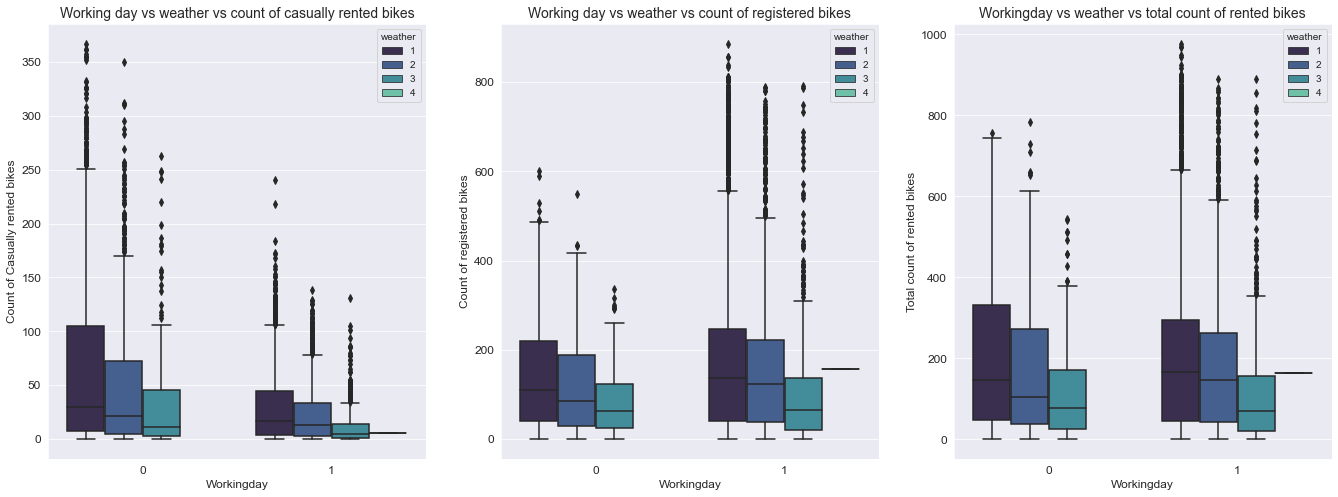

In [302]:
plt.figure(figsize = (23,8))

plt.subplot(1,3,1)
plt.title('Working day vs weather vs count of casually rented bikes',
         fontsize = 14)
sns.boxplot(x = 'workingday',y = 'casual',hue = 'weather',
            palette = 'mako',data = df)
plt.xlabel('Workingday',fontsize = 12)
plt.ylabel('Count of Casually rented bikes',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.subplot(1,3,2)
plt.title('Working day vs weather vs count of registered bikes',
         fontsize = 14)
sns.boxplot(x = 'workingday',y = 'registered',hue = 'weather',
            palette = 'mako',data = df)
plt.xlabel('Workingday',fontsize = 12)
plt.ylabel('Count of registered bikes',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.subplot(1,3,3)
plt.title('Workingday vs weather vs total count of rented bikes',
          fontsize = 14)
sns.boxplot(x = 'workingday',y = 'count',hue = 'weather',
            data = df,palette = 'mako')
plt.xlabel('Workingday',fontsize = 12)
plt.ylabel('Total count of rented bikes',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

## Observations:
- Weather 1:
    - Median of count of casually rented bikes on weather 1 is more on non-workingdays as compared to workingdays.
    - Median of count of registered bikes on weather 1 is less on non-workingdays as compared to workingdays.
    - Median of total count of rented bikes on weather 1 is less on non-workingdays as compared to workingdays.
- Weather 2:
    - Median of count of casually rented bikes on weather 2 is more on non-workingdays as compared to workingdays.
    - Median of count of registered bikes on weather 2 is less on non-workingdays as compared to workingdays.
    - Median of total count of rented bikes on weather 2 is less on non-workingdays as compared to workingdays.
- Weather 3:
    - Median of count of casually rented bikes on weather 3 is more on non-workingdays as compared to workingdays.
    - Median of count of registered bikes on weather 3 is less on non-workingdays as compared to workingdays.
    - Median of total count of rented bikes on weather 3 is same on both non-workingdays and workingdays.

### Relationship between season , windspeed and number of bikes rented

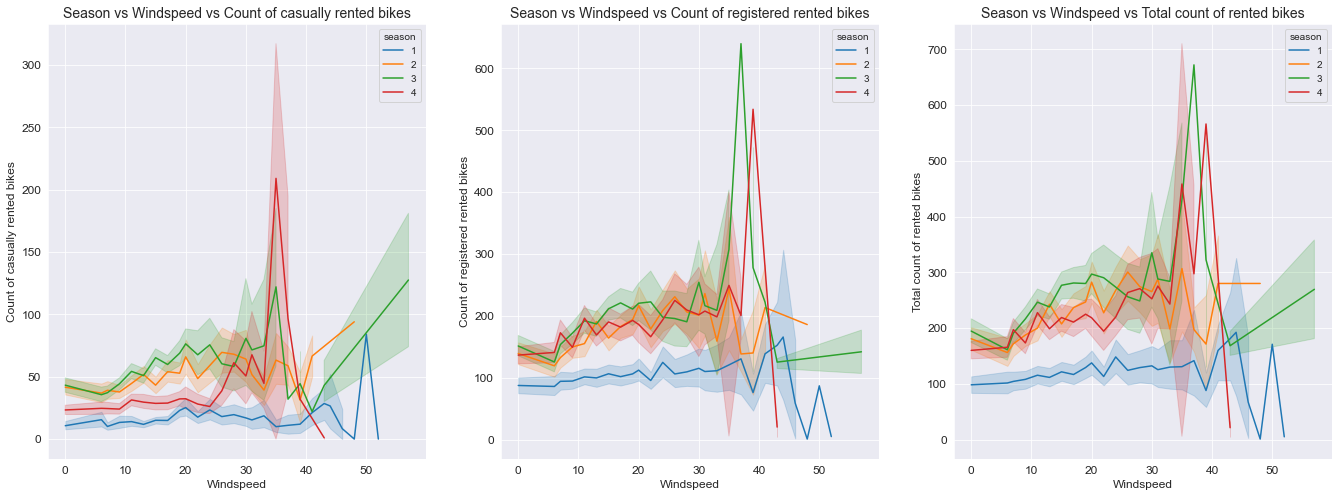

In [303]:
plt.figure(figsize = (23,8))
plt.subplot(1,3,1)
plt.title('Season vs Windspeed vs Count of casually rented bikes',
         fontsize = 14)
sns.lineplot(x = 'windspeed',y = 'casual',hue = 'season',data = df)
plt.xlabel('Windspeed',fontsize = 12)
plt.ylabel('Count of casually rented bikes',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.subplot(1,3,2)
plt.title('Season vs Windspeed vs Count of registered rented bikes',
         fontsize = 14)
sns.lineplot(x = 'windspeed',y = 'registered',hue = 'season',data = df)
plt.xlabel('Windspeed',fontsize = 12)
plt.ylabel('Count of registered rented bikes',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.subplot(1,3,3)
plt.title('Season vs Windspeed vs Total count of rented bikes',
         fontsize = 14)
sns.lineplot(x = 'windspeed',y = 'count',hue = 'season',data = df)
plt.xlabel('Windspeed',fontsize = 12)
plt.ylabel('Total count of rented bikes',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

## Observations:
- **For Casually rented bikes:**
    - The overall count of bookings increased with multiple downs in between for season 2 (summer) and season 3 (fall) with increase in windspeed.
    - The overall count of bookings decreased with multiple ups in between for season 1 (spring) and season 4 (winter) with increase in windspeed.
- **For total count of rented bikes:**
    - The overall count of bookings have increased in season 3 (fall) and season 2 (summer) with multiple ups and downs with the increase in windspeed.

## Correlation Test

<AxesSubplot:>

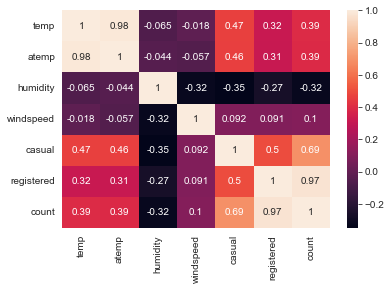

In [304]:
sns.heatmap(df.corr(),annot = True)

## Observations
- It is observed atemp and temp are positively correlated.

## Does working day has any effect on number of bikes rented?

To check if working day has any effect on the number of electric cycles rented we will need to perform T-test.
- Null Hypothesis: Working day has no effect on the number of electric cycles rented.
- Alternate Hypothesis : Working day has effect on the number of electric cycles rented.  

## Distribution of working and non-working data groups

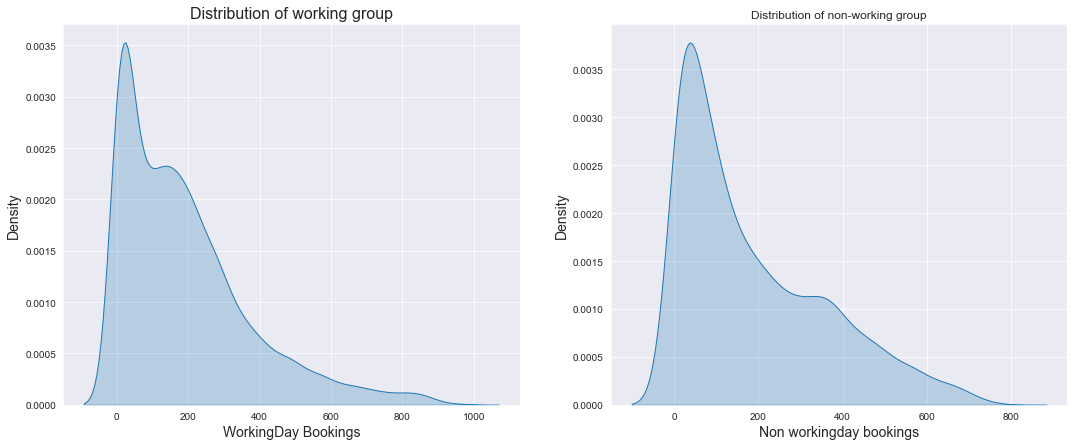

In [305]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
plt.title('Distribution of working group',
          fontsize = 16)
sns.kdeplot(working,fill = True)
plt.xlabel('WorkingDay Bookings',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

plt.subplot(1,2,2)
plt.title('Distribution of non-working group')
sns.kdeplot(non_working,fill = True)
plt.xlabel('Non workingday bookings',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

plt.show()

In [306]:
#Separating number of bikes rented on working day and non-working day
working = df.loc[df['workingday']=='1','count']
non_working = df.loc[df['workingday']=='0','count']

## Checking for assumptions of ttest.
- The assumption for ttest is that the variance in both the groups should be same.
- The ratio of variance of the larger datagroup to the small datagroup should be less than 4:1, only than we can consider that the given datagroups have equal variance

In [307]:
#Variance of working group and non working group
Ho = 'Variance is equal in both working and non_working groups'
Ha = 'Variance is not equal in both working and non_working groups'
lstat,pval = levene(working,non_working)
print(pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

0.9437823280916695
Failed to reject Ho
Variance is equal in both working and non_working groups


### Since Varaince is equal in both the groups we can perform ttest.

In [308]:
#Hypothesis Testing
Ho = 'Working day has no effect on the number of electric cycles rented.'
Ha = 'Working day has effect on the number of electric cycles rented.'
alpha = 0.05
tstat,pval = ttest_ind(working,non_working)
print('P-Value :',pval)
if pval<alpha:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-Value : 0.22644804226361348
Failed to reject Ho
Working day has no effect on the number of electric cycles rented.


Since p-value is more than alpha we have failed to reject the Null Hypothesis. Hence Working day has no effect on the number of electric cycles rented.

## Is number of cycles rented is similar or different in different seasons.

Here we will use anova to test the hypothesis. 
- Null Hypothesis : Number of cycles rented is similar in different seasons.
- Alternate Hypothesis: Number of cycles rented is not similar in different seasons.

In [309]:
#separating number of bikes rented for every season into different groups
season_1 = df.loc[df['season']=='1','count']
season_2 = df.loc[df['season']=='2','count']
season_3 = df.loc[df['season']=='3','count']
season_4 = df.loc[df['season']=='4','count']

## Checking how the seasons effect the number of bikes reneted visually.

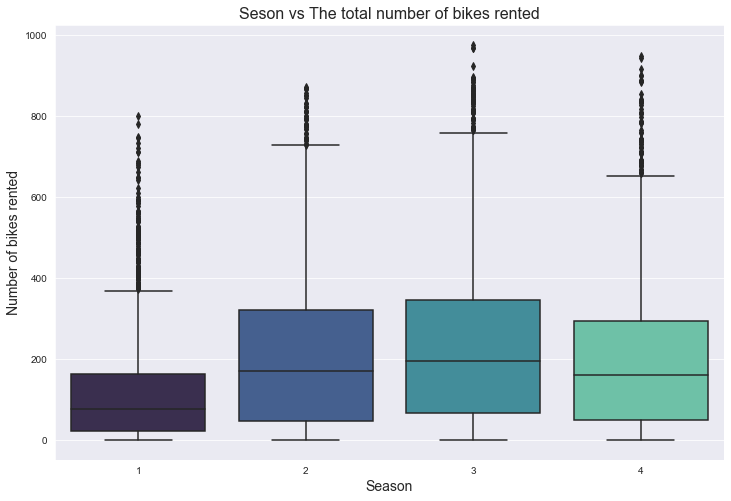

In [310]:
plt.figure(figsize = (12,8))
plt.title('Seson vs The total number of bikes rented',
         fontsize = 16)
sns.boxplot(x = 'season',y = 'count',
            palette = 'mako',data = df)
plt.xlabel('Season',fontsize = 14)
plt.ylabel('Number of bikes rented',
          fontsize = 14)
plt.show()

## Assumptions for ANOVA test:
- 1. The data should follow gaussian distribution.
- 2. The observations is each group are independent of each other.
- 3. The variances of the population that the samples come from are equal. 

## The data should follow gaussian distribution.
For this assumption we will do qqplot and shapiro test.

C:\Users\debas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

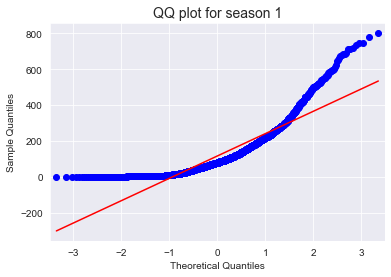

In [311]:
plt.figure(figsize = (12,8))
qqplot(season_1.sample(2500),line = 's')
plt.title('QQ plot for season 1',
         fontsize = 14)
plt.show()

C:\Users\debas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

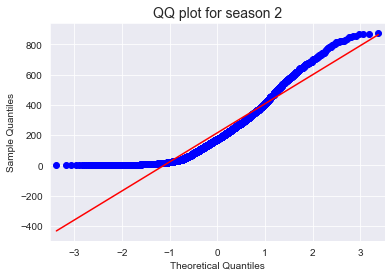

In [312]:
plt.figure(figsize = (12,8))
qqplot(season_2,line = 's')
plt.title('QQ plot for season 2',
         fontsize = 14)
plt.show()

C:\Users\debas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

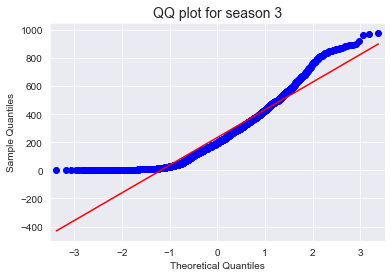

In [313]:
plt.figure(figsize = (12,8))
qqplot(season_3,line = 's')
plt.title('QQ plot for season 3',
         fontsize = 14)
plt.show()

C:\Users\debas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

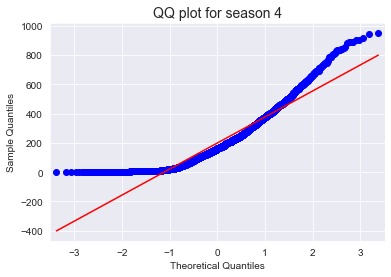

In [314]:
plt.figure(figsize = (12,8))
qqplot(season_4,line = 's')
plt.title('QQ plot for season 4',
         fontsize = 14)
plt.show()

## Observations:
- From the above graphs it is observed that none of the season groups follow gaussian distribution.

## Shapiro Test for all the seasons to check if they follow normal distribution.

In [315]:
#For season 1 
season_1_sub = season_1.sample(150)
Ho = 'Season 1 is gaussian'
Ha = 'Season 1 is not gaussian'
test_stat,pval = shapiro(season_1_sub)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 4.319154842807871e-12
Reject Ho
Season 1 is not gaussian


In [316]:
#For season 2 
season_2_sub = season_2.sample(150)
Ho = 'Season 2 is gaussian'
Ha = 'Season 2 is not gaussian'
test_stat,pval = shapiro(season_2_sub)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 2.7394195356578166e-08
Reject Ho
Season 2 is not gaussian


In [317]:
#For season 3 
season_3_sub = season_3.sample(150)
Ho = 'Season 3 is gaussian'
Ha = 'Season 3 is not gaussian'
test_stat,pval = shapiro(season_3_sub)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 5.194982985456953e-11
Reject Ho
Season 3 is not gaussian


In [318]:
#For season 4 
season_4_sub = season_4.sample(150)
Ho = 'Season 4 is gaussian'
Ha = 'Season 4 is not gaussian'
test_stat,pval = shapiro(season_4_sub)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 6.740932256832366e-10
Reject Ho
Season 4 is not gaussian


### From the above 2 tests, qqplot and shapiro we have concluded that the data doesnot follow gaussian distribution.

## For equal variance in all the data groups we follow levene test

In [319]:
#Setting Null and Alternate Hypothesis
Ho = 'Variance is equal in all the season groups'
Ha = 'Variance is not equal in all the season groups'
levene_stat,pval = levene(season_1,season_2,season_3,season_4)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

Reject Ho
Variance is not equal in all the season groups


### Since our assumptions have failed so we will use Kruskal Test.

In [320]:
#Setting Null and Alternate hypothesis for Kruskal Test.
Ho = 'Mean of cycles rented is similar in different seasons.'
Ha = 'Mean of cycles rented is not similar in different seasons.'

k_stat,pval = kruskal(season_1,season_2,season_3,season_4)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 2.479008372608633e-151
Reject Ho
Mean of cycles rented is not similar in different seasons.


## Since our mean of cycles rented is different in different seasons we can say that number of bookings is different in different seasons.

## Is the number of cycles rented is similar or different in different weather.

Here we will use anova to test the hypothesis.
- Null Hypothesis : The number of cycles rented is similar in different weather.
- Alternate Hypothesis : The number of cycles rented is not similar in different weather.

### Checking how weather effects the number of bikes rented

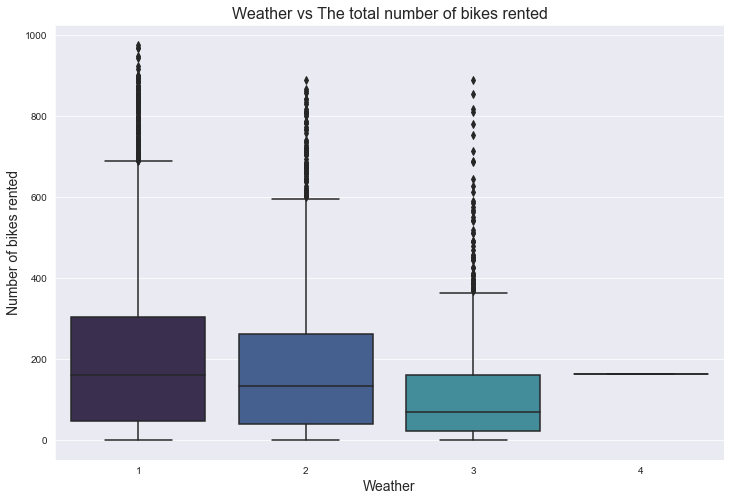

In [321]:
plt.figure(figsize = (12,8))
plt.title('Weather vs The total number of bikes rented',
         fontsize = 16)
sns.boxplot(x = 'weather',y = 'count',
            palette = 'mako',data = df)
plt.xlabel('Weather',fontsize = 14)
plt.ylabel('Number of bikes rented',
          fontsize = 14)
plt.show()

## Assumptions for ANOVA test:
- 1. The data should follow gaussian distribution.
- 2. The observations is each group are independent of each other.
- 3. The variances of the population that the samples come from are equal. 

In [322]:
#separating number of bikes rented for every season into different groups
w_1 = df.loc[df['weather']=='1','count']
w_2 = df.loc[df['weather']=='2','count']
w_3 = df.loc[df['weather']=='3','count']

## The data should follow gaussian distribution.
For this assumption we will do qqplot and shapiro test.

C:\Users\debas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

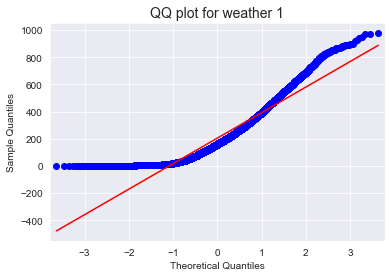

In [323]:
plt.figure(figsize = (12,8))
qqplot(w_1,line = 's')
plt.title('QQ plot for weather 1',
         fontsize = 14)
plt.show()

C:\Users\debas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

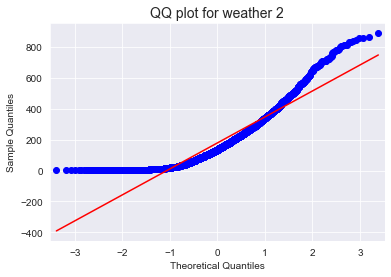

In [324]:
plt.figure(figsize = (12,8))
qqplot(w_2,line = 's')
plt.title('QQ plot for weather 2',
         fontsize = 14)
plt.show()

C:\Users\debas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

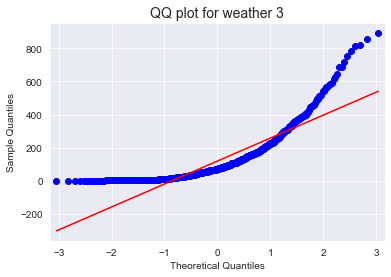

In [325]:
plt.figure(figsize = (12,8))
qqplot(w_3,line = 's')
plt.title('QQ plot for weather 3',
         fontsize = 14)
plt.show()

## Shapiro Test for all weathers to check if they follow Gaussian Distribution

In [326]:
#For weather 1 
w_1_sub = w_1.sample(150)
Ho = 'Weather 1 is gaussian'
Ha = 'Weather 1 is not gaussian'
test_stat,pval = shapiro(w_1_sub)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 5.071387310096043e-09
Reject Ho
Weather 1 is not gaussian


In [327]:
#For weather 1 
w_2_sub = w_3.sample(150)
Ho = 'Weather 2 is gaussian'
Ha = 'Weather 2 is not gaussian'
test_stat,pval = shapiro(w_2_sub)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 3.7456628078664654e-16
Reject Ho
Weather 2 is not gaussian


In [328]:
#For weather 1 
w_3_sub = w_3.sample(150)
Ho = 'Weather 3 is gaussian'
Ha = 'Weather 3 is not gaussian'
test_stat,pval = shapiro(w_3_sub)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 1.5446716442827496e-13
Reject Ho
Weather 3 is not gaussian


### From the above 2 tests, qqplot and shapiro we have concluded that the data doesnot follow gaussian distribution.

## For equal variance in all the data groups we follow levene test

In [329]:
#Setting Null and Alternate Hypothesis
Ho = 'Variance is equal in all the weather groups'
Ha = 'Variance is not equal in all the weather groups'
levene_stat,pval = levene(w_1,w_2,w_3,w_4)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)


Reject Ho
Variance is not equal in all the weather groups


### Since our assumptions have failed so we will use Kruskal Test.

In [330]:
#Setting Null and Alternate hypothesis for Kruskal Test.
Ho = 'Mean of cycles rented is similar in different weathers.'
Ha = 'Mean of cycles rented is not similar in different weathers.'

k_stat,pval = kruskal(w_1,w_2,w_3,w_4)
print('P-value :',pval)
if pval<0.05:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

P-value : 3.501611300708679e-44
Reject Ho
Mean of cycles rented is not similar in different weathers.


### Hence we can say that the number of cycles rented in each weather is different.

## Checking if weather is dependent on season

For this question we will use Chi-square test because we have 2 categorical features.
- Null Hypothesis: Weather is independent of Season.
- Alternate Hypothesis: Weather is dependent of Season.

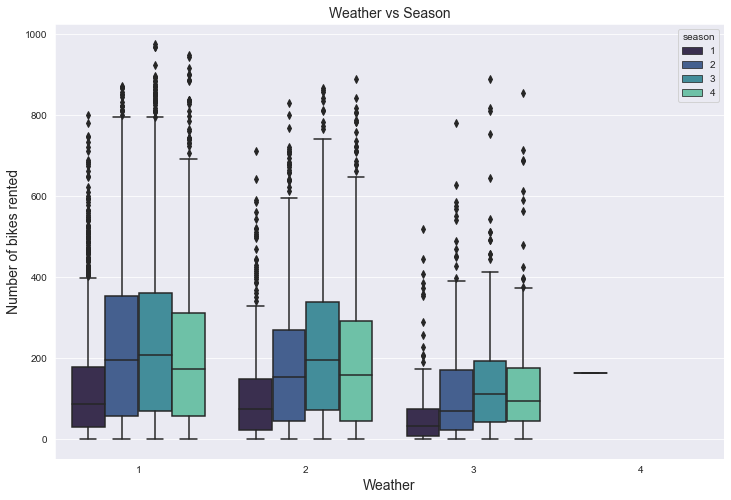

In [331]:
plt.figure(figsize = (12,8))
plt.title('Weather vs Season',
         fontsize = 14)
sns.boxplot(x = 'weather',y = 'count',hue = 'season',
            palette = 'mako',data = df)
plt.xlabel('Weather',fontsize = 14)
plt.ylabel('Number of bikes rented',fontsize = 14)
plt.show()

## Checking for assumptions of Chi-square test.
- 1. The cells in the contingency table are mutually exclusive.
- 2. The attributes are categorical.
- 3. All observations are independent.
- 4. The expected value in each cell should be greater than 5

## Contingency Table for weather and season.

In [332]:
tab = pd.crosstab(index = df['season'],
                 columns = df['weather'],
                 values = df['count'],
                 aggfunc = np.sum)
tab

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,NaN
3,470116.0,139386.0,31160.0,NaN
4,356588.0,157191.0,30255.0,NaN


We will drop weather 4 column because the expected value for that column is less than 5.

In [333]:
tab = pd.crosstab(index = df['season'], 
                          columns = df.loc[df['weather'] != 4, 'weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).to_numpy()[:, :3]
tab

array([[223009.,  76406.,  12919.],
       [426350., 134177.,  27755.],
       [470116., 139386.,  31160.],
       [356588., 157191.,  30255.]])

In [334]:
Ho = 'Weather is independent of season'
Ha = 'Weather is dependent on season'
alpha = 0.05
chi_stat,pval,df,ex = chi2_contingency(tab)
print(pval)
if pval<alpha:
    print('Reject Ho')
    print(Ha)
else:
    print('Failed to reject Ho')
    print(Ho)

0.0
Reject Ho
Weather is dependent on season


### Therefore , there is significant dependency of weather on season.

## Observations:

- Season 3 (Fall) the number of bookings is highest.
- In non holidays the number of bookings are highest for both casually and registered rented bikes as well as total count of rented bikes.
- For the registered bikes and the overall total count of rented bikes the highest booking is seen on working days.
- It is observed that highest number of bookings is done on weather 1 (Clear, Few Clouds, partly cloudy) for both casually and registered rented bikes as well as the overall count of bookings.
- It is observed that as the temperature increases the number of bookings of casually registered bikes have increased. For registered rented bikes the overall number of bookings have also increased with lots of dips in between.
- It is oberserved that at 14:00:00 the average number of casually rented bookings is highest
- It is observed that at 17:00:00 the average number of registered bikes bookings is highest.
- The median of number of bookings for rented bikes is more on holidays.

## Recommendations:

- When the weather is clear or with few clouds the company should be expecting to have more number of bookings. So they should have lot of bikes in stock.
- From 14:00:00 to 20:00:00 Yulu should charge more because the number of bookings is highest in this time duration.
- Yulu should focus on comming up with new marketing startegies for winter and spring to attract more customers.
- During holiday that fall in summer and fall have high bookings so Yulu should focus on special discounts on such occassions and other holidays also.